In [16]:
import numpy as np 
import pandas as pd
import numpy as np
import os
import imutils
import dlib 
import cv2 
import imageio
from imutils import face_utils
from skimage.transform import resize
import time

In [17]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
# people = ['F01','F02','F04','F05']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [18]:
max_seq_length = 22

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []


MAX_WIDTH = 100
MAX_HEIGHT = 100

In [19]:
t1 = time.time()
UNSEEN_VALIDATION_SPLIT = ['F07', 'M02']
# UNSEEN_VALIDATION_SPLIT = ['F05']

UNSEEN_TEST_SPLIT = ['F04']

directory = 'D:/Projects/MIRACL-VC1/cropped'

for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
#             print(f"Word : '{words[word_index]}'")
            for iteration in instances:
                path = os.path.join(directory, person_id, data_type, word, iteration)
                # filelist = sorted(os.listdir(path + '/'))
                filelist = sorted(os.listdir(path))

                sequence = [] 
                for img_name in filelist:
                    if img_name.startswith('color'):
                        image = imageio.imread(path + '/' + img_name)
                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                        image = 255 * image
                        # Convert to integer data type pixels.
                        image = image.astype(np.uint8)
                        sequence.append(image)                        
                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]                            
                sequence.extend(pad_array * (max_seq_length - len(sequence)))
                sequence = np.array(sequence)
                                
                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                elif person_id in UNSEEN_VALIDATION_SPLIT:
                    X_val.append(sequence)
                    y_val.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)    
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')    
    
t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those cropped lip regions : {t2 - t1} secs.")

C:\Users\deepdesk\AppData\Local\Temp\ipykernel_14816\1417641816.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + '/' + img_name)


Finished reading images for person F01. Time taken : 5.442631959915161 secs.
Finished reading images for person F02. Time taken : 5.258516550064087 secs.
Finished reading images for person F04. Time taken : 9.28353762626648 secs.
Finished reading images for person F05. Time taken : 8.026113033294678 secs.
Finished reading images for person F06. Time taken : 8.701011657714844 secs.
Finished reading images for person F07. Time taken : 7.386072635650635 secs.
Finished reading images for person F08. Time taken : 6.539915561676025 secs.
Finished reading images for person F09. Time taken : 6.368438005447388 secs.
Finished reading images for person F10. Time taken : 6.136327743530273 secs.
Finished reading images for person F11. Time taken : 6.025261402130127 secs.
Finished reading images for person M01. Time taken : 7.694720506668091 secs.
Finished reading images for person M02. Time taken : 10.318457126617432 secs.
Finished reading images for person M04. Time taken : 8.851693391799927 secs.

In [20]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [21]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1200, 22, 100, 100)
(200, 22, 100, 100)
(100, 22, 100, 100)


In [22]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [23]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1200,)
(200,)
(100,)


In [26]:
# np.save('X_train',X_train)
# np.save('X_val',X_val)
# np.save('X_test',X_test)
# np.save('y_train',y_train)
# np.save('y_val',y_val)
# np.save('y_test',y_test)

In [33]:
# X_train, X_val, X_test, y_train, y_val, y_test = np.load('X_train.npy'),np.load('X_val.npy'),np.load('X_test.npy'),np.load('y_train.npy'),np.load('y_val.npy'),np.load('y_test.npy')

## Normalization

In [34]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [35]:
from keras.utils import np_utils, generic_utils

In [36]:
X_train = normalize_it(X_train)
X_val = normalize_it(X_val)
X_test = normalize_it(X_test)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)

C:\Users\deepdesk\AppData\Local\Temp\ipykernel_14816\3382126703.py:4: RuntimeWarning: invalid value encountered in true_divide
  X = (X - v_min)/(v_max - v_min)


In [37]:
X_train = np.expand_dims(X_train, axis=4)
X_val = np.expand_dims(X_val, axis=4)
X_test = np.expand_dims(X_test, axis=4)

In [38]:
X_test.shape

(100, 22, 100, 100, 1)

In [39]:
np.save('X_train',X_train)
np.save('X_val',X_val)
np.save('X_test',X_test)
np.save('y_train',y_train)
np.save('y_val',y_val)
np.save('y_test',y_test)

In [1]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [15]:
# # release GPU memory
# from keras import backend as K
# K.clear_session()

# from numba import cuda
# cuda.select_device(0)
# cuda.close()

In [2]:
model = Sequential()

# 1st layer group
model.add(Conv3D(64, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(256, (2, 2, 2), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add((Flatten()))

# # FC layers group
model.add(Dense(4096, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 98, 98, 64)    1792      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 49, 49, 64)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 47, 47, 128)    221312    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 23, 23, 128)   0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 3, 22, 22, 256)    262400    
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 1, 11, 11, 256)   0

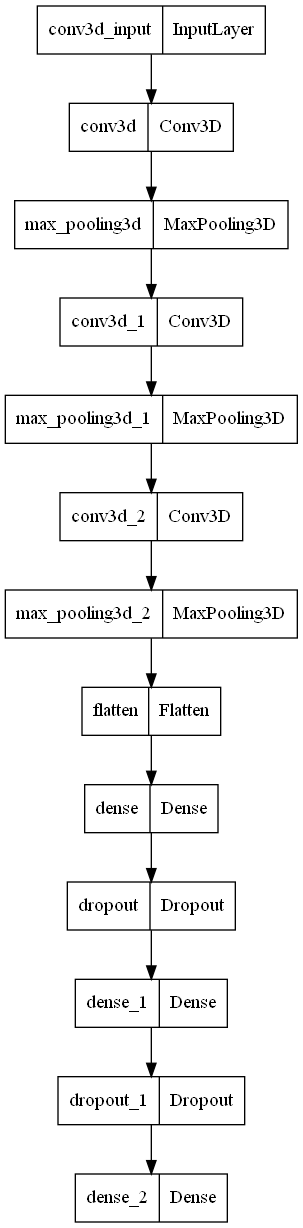

In [3]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

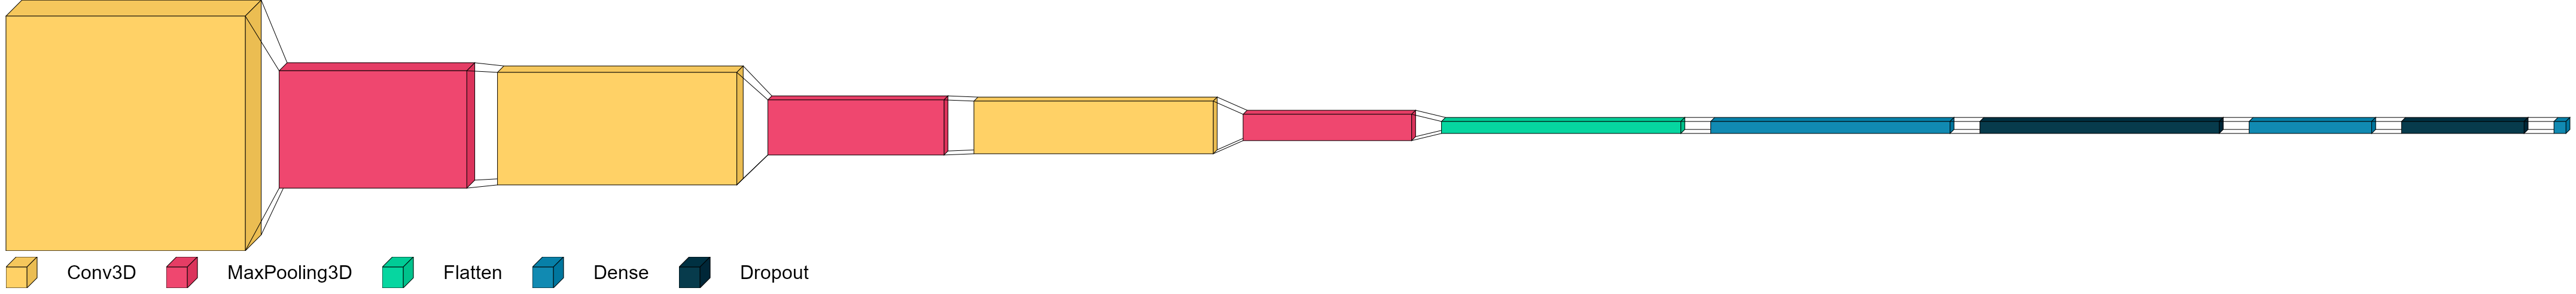

In [15]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font, spacing=50)  # font is optional!

In [17]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 1)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
1200/1200 [==============================] - 49s 38ms/step - loss: 2.3053 - accuracy: 0.1075 - val_loss: 2.2940 - val_accuracy: 0.0950
Epoch 2/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.2950 - accuracy: 0.1158 - val_loss: 2.2793 - val_accuracy: 0.1250
Epoch 3/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.2760 - accuracy: 0.1342 - val_loss: 2.2124 - val_accuracy: 0.2000
Epoch 4/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.2551 - accuracy: 0.1583 - val_loss: 2.1842 - val_accuracy: 0.2000
Epoch 5/45
1200/1200 [==============================] - 44s 37ms/step - loss: 2.2086 - accuracy: 0.1758 - val_loss: 2.0871 - val_accuracy: 0.2450
Epoch 6/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.1133 - accuracy: 0.2308 - val_loss: 1.8989 - val_accuracy: 0.4150
Epoch 7/45
1200/1200 [==============================] - 45s 37ms/step - loss: 1.8817 - accuracy: 0.3100 - val_loss: 1.6627 -

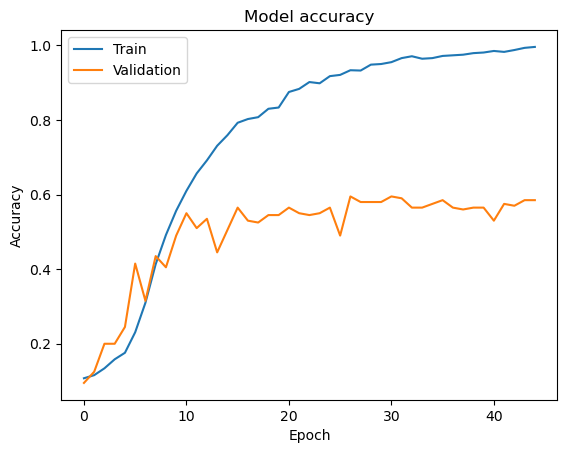

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
model.save('D:/Projects/MIRACL-VC1/models/cnn_adagrad_e45_bc1/model.h5')

In [25]:
model.save_weights('D:/Projects/MIRACL-VC1/models/cnn_adagrad_e45_bc1/model_weights.h5')

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
savedModel=load_model('D:/Projects/MIRACL-VC1/models/cnn_adagrad_e45_bc1/model.h5')

In [41]:
ypred = savedModel.predict(X_test)

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv3d/Conv3D' defined at (most recent call last):
    File "c:\Users\deepdesk\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\deepdesk\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\deepdesk\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\deepdesk\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\deepdesk\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\deepdesk\AppData\Local\Temp\ipykernel_14816\1495168974.py", line 1, in <module>
      ypred = savedModel.predict(X_test)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\deepdesk\anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv3d/Conv3D'
OOM when allocating tensor with shape[32,64,20,98,98] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv3d/Conv3D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_659]

In [42]:
predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
actual_words = [words[i] for i in np.argmax(y_test, axis=1)] 

NameError: name 'ypred' is not defined

In [ ]:
correct = 0
for p, a in zip(predicted_words, actual_words):
    if p == a:
        correct += 1
#     print(f"Predicted : {p} \t Actual : {a}")

accuracy = correct/len(actual_words)
print(f"Accuracy = {accuracy} on completely unseen data")

In [4]:
file_list = os.listdir('D:/Projects/external_data/cropped')

In [5]:
import numpy as np
import os
import imutils
import dlib # run "pip install dlib"
import cv2 # run "pip install opencv-python"

import imageio
from imutils import face_utils

In [7]:
max_seq_length = 22

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []


MAX_WIDTH = 100
MAX_HEIGHT = 100

In [8]:
from skimage.transform import resize
import time
sequence = []
for img_name in file_list:        
    image = imageio.imread('D:/Projects/external_data/cropped/' + img_name)
    image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
    image = 255 * image
    # Convert to integer data type pixels.
    image = image.astype(np.uint8)
    sequence.append(image)                        
pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]                            
sequence.extend(pad_array * (max_seq_length - len(sequence)))
sequence = np.array(sequence)


C:\Users\deepdesk\AppData\Local\Temp\ipykernel_2696\775558860.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('D:/Projects/external_data/cropped/' + img_name)


In [11]:
X_test.append(sequence)

In [12]:
X_test = np.array(X_test)
print(X_test.shape)

(1, 22, 100, 100)


In [13]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [14]:
X_test = normalize_it(X_test)

C:\Users\deepdesk\AppData\Local\Temp\ipykernel_2696\3382126703.py:4: RuntimeWarning: invalid value encountered in true_divide
  X = (X - v_min)/(v_max - v_min)


In [15]:
from keras.utils import np_utils, generic_utils

In [16]:
X_test = np.expand_dims(X_test, axis=4)

In [17]:
print(X_test.shape)

(1, 22, 100, 100, 1)


In [19]:
ypred = savedModel.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [20]:
ypred

array([[9.9690139e-01, 4.7577071e-09, 3.4452377e-09, 7.0146339e-10,
        3.0981945e-03, 2.6367669e-10, 1.3629773e-07, 3.5865384e-07,
        2.3879385e-10, 3.2664069e-08]], dtype=float32)

In [21]:
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']  
predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
print(predicted_words)

['Begin']


In [22]:
# release GPU memory
from keras import backend as K
K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()

In [20]:
# t1 = time.time()
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 8)
# t2 = time.time()
# print()
# print(f"Training time : {t2 - t1} secs.")

In [43]:
# # release GPU memory
# from keras import backend as K
# K.clear_session()

# from numba import cuda
# cuda.select_device(0)
# cuda.close()

batch_size > 1 returned Out Of Memory error due to insufficient of VRam on the GPU